<a href="https://colab.research.google.com/github/zcrenshaw/Crenshaw_Coding_Examples/blob/master/Crenshaw_CompVis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zachary Crenshaw <br/>
Professor Michael Maire  <br/>
Introduction to Computer Vision (CMSC 25400) <br/>
Final Project  <br/>

**ASL Manual Alphabet Recognition with Convolutional Neural Networks**

**Introduction**

In this project I built a system that recognizes letters of the manual alphabet of American Sign Language (ASL). In recent years great strides have been made in the domain of Automatic Sign Recognition, but much work is left to do. Many previous implementations of fingerspelling recognition systems have required datasets with simplified backgrounds or heavy preprocessing. My system is designed as the last step in a fingerspelling recognition pipeline with attention [1], which is the current state-of-the-art. My system, which I call ZenNet (Zack and Ben Net, as Ben Prevor was originally my partner) is a convolutional neural network (CNN) that recognizes the letters of the manual alphabet from single, still images. These images do not have any preprocessing other than a simple normalization step. My network is based off the architecture in [2], with some edits applied to improve performance. 

I found that our network significantly outperforms that of the original paper (although the datasets were different). Using dropout and a 5x5 filter size on convolutional layers, I achieve nearly 98% accuracy at test time. 

I also tested the model on Gaussian and motion blurring. Many real-world recognition systems use data that is not picture-perfect, and these two types of blur are common issues that I have found in my own sign language research. The model is fairly robust to Gaussian blur, but rather sensitive to motion blur. Some edits to the architecture and training process may need to be done if this system were ever used in a real-world application, but for now it does very well for the task at hand.



**Method**

The full manual ASL alphabet has 26 letters, with 2 letters (J and Z)involving motion, and so these two letters were be excluded from my recognizer system for simplicity. 

I used a dataset [3] with 66000 RGB images of the 24 letters, trimmed to 90x150 pixels, which was a good approximation for the dimensions of the average image. I trained our system on 54000 of these images, with about 6000 images used for validation, and about 6000 used for final testing. 

*Figure 1: The full manual alphabet of ASL:*

![ASL Manual Alphabet](https://drive.google.com/uc?id=1h7jKe6oiqfXRLcKNa40IC-McPzE_ENQ9)

I started with our best approximation of the architecture in the original paper [2]. This consists of 3 blocks of 2 Convolutional layers of 3x3 filter with ReLU Activation, with a 2x2 Max Pool layer and 0.25 dropout between each block. Then there is a flattening step between three full convolutional layers, with 0.5 dropout between each (see the figure below). From this basic network we adapted it to observe changes in test accuracy. Each network was first trained on 10 epochs, which was selectively expanded to further test results. The default batch size was 72, to balance memory and run time constraints with useful updates of the parameters (72 images randomly selected from the data ensures an average of 3 instances of each letter for each batch). The model was trained using Adam to compute gradient descent, with the standard hyperparameters and learning rate of 1e-4, seen in the code portion, and computed loss using standard cross entropy loss. The validation performace was checked every 100 iterations, which is every 7200 images.

*Figure 2: The architecture from the original paper:*

![Original Architecture](https://drive.google.com/uc?id=1KUBqWcRw5rz4NUHLBzSQilAEiu-vk_V6)

I tried a number of different models, as outlined below. The best model, FiveZenNet, has the same structure as the vanilla ZenNet, but with 5x5 convolutional filters instead of 3x3.





*Descriptions of Each Iteration of the Network*


*   ZenNet: My best approximation of the network in the original paper.
*   SubZenNet: The architecture in the original paper, without dropout, to test the differences in performance
*   FiveZenNet: The Vanilla network but with 5x5 convolutional filters, instead of 3x3 convolulutional filters
*   SevZenNet: The Vanilla network but with 7x7 convolutional filters, instead of 3x3 convolulutional filters
*   ChangeZenNet: Vanilla network with 3x3 convolutional filters for the first 3 Conv layers, then 5x5 filters for the last 3 layers.




*Blurring testing*

Most applications of sign and fingerspelling recognition that are the most use in the real world involves video feeds of varying quality and shutter speed. I have attempted to simulate such complications by applying Gaussian and Motion blurring to the images. I tested the best performing model FiveZenNet on augmented version of the test set with these two types of blurring, to see how the model might perform in a real-world application. I also compared the model merely tested on this augmentation, and the model trained on it for ten epochs. For the Gaussian blur, the input was randomly blurred with an integer sigma value of [1,3]. For the motion blur, the input was randomly blurred in one of the four cardinal directions and diagonals, with a filter size [3,15], where a larger filter corresponds to a greater degree of blurring. See Appendices for examples of this blurring on the dataset.

**Results**

The final test accuracy for all versions of the network, and also the training and validation accuracy curves for the vanilla network, and my best running model, are as follows:

*   ZenNet: 95.6% (10 epochs), 97.0% (25 epochs)
*   SubZenNet: 94.6% (10 epochs)
*   FiveZenNet: 97.2% (10 epochs)
*   SevZenNet: 96.6% (10 epochs)
*   ChangeZenNet: 96.2% (10 epochs)
*   FiveZenNet, rerun: 97.0% (10 epochs), 97.0% (25 epochs), 97.8% (50 epochs), 97.5% (100 epochs)

FiveZenNet performed the best at test time, with a test accuracy of 97.2% on the initial testing. All models were compared after 10 epochs, because through testing of the vanilla network, additional epochs only slightly improved performance (1.5% increase). The best network (FiveZenNet) was learned for 10, 25, 50, and 100 epochs to compare performance, as seen above. The model achieved a maximum test accuracy of 97.8% after 50 epochs. It appears that the model only has marginal gains in performace, under 1% at test time, beyond 10 epochs. As seen in Figure 3, the FiveZenNet also trained to higher accuracy faster than other networks.

SubZenNet did not perform dramatically worse than ZenNet at test time, but did see a reduction of 1% accuracy. As expected for a network without dropout, it trained to have more accuracy faster, but it ultimately had lower accuracy after 10 epochs. I also tried different learning rates on the vanilla ZenNet, but none did as well as 1e-4.

*Figure 3: Training Loss and Validation Accuracy for different network variations, Smoothed with Savitzky–Golay filter*
![Training Loss and Validation Accuracy, Network Variations, Linear Scale](https://drive.google.com/uc?id=1rcyWPr_PpHo1JJRG_lUQeU27IKLnUFBZ)

A pretrained FiveZenNet achieved 94.3% accuracy on Gaussian blurring and 37.6% accuracy on motion blurring at test time. This shows that the model may be robust to Gaussian blurring, but not motion blurring. It should be noted however, that the motion blurring may not be having the effect expected, although it does seem to transform the images significantly (see Appendices). 

When FiveZenNet is trained on Gaussian and Motion blurring, it performs with 96.1% accuracy and 76.6% accuracy at test time, respectively. This shows that while the network is still not optimal for motion blurring, it can be trained to adapt to that type of augmentation. It is interesting to note that the network trained on the three blurring types (No blur, Gaussian, motion) appears to reduce loss at comparable rates and levels, but motion blur still performs worse at validation and test time (see Figure 4 for details).

*Figure 4: Training Loss and Validation Accuracy between blurring types, smoothed with Savistzky-Golay filter*
![Training Loss and Validation Accuracy, Blur Variations, Linear Scale](https://drive.google.com/uc?id=16AHCNepICpdEsnkVoXj-aHdAqk2g2_jy)

**Discussion**

The model performs exceptionally well on this task, with the best model FiveZenNet obtaining a test accuracy of 97.2% after just 10 epochs. Additional training epochs did not increase the accuracy at test time by a significant margin. 

It would seem that 5x5 convolutional layers performed the best for this imaage size and task, although it should be noted that a max pooling layer was removed from SevNet due to size constraints, which may have impacted performace.

Dropout appears to be a useful tool for improving model performance, as without it, the SubZenNet had a reduction in test accuracy of 1%.

It has been shown in this experiement that our implementation of the ZenNet performed significantly better than the original model. Perhaps this is due to the specifics of the network channel sizes, or, more likely, our dataset was easier than previously thought. Qualitatively, many of the images in the data set appear similar, but it should our dataset is not just of cut out images of hands, as in the original paper. This dataset includes real images with somewhat complex backgrounds, often including faces, so the data is a closer approximation of real world data in applications of fingerspelling recognition. 

However, the real world does not always yield as high quality images as in the dataset. Applications of sign language recognition are only useful if people can use them on everyday devices in everyday scenarios, which often leads to blurred input. Two common types of blurring are Gaussian and motion blurring. A pretrained FiveZenNet version of our model performed robustly on Gaussian blurring, but was sensitive to motion blurring. When trained on blurry datasets, the model improved at test time, but the even re-trained model did not perform as well at test time as network trained on the unaugmented data. This shows that our model's architecture is somewhat robust, but not impervious, to different types of blur, even when trained on such blurred data. A model such as this could have relevant application in the real world, although some adjustments may have to be made depending on the exact application.

**References**

*Include a list of any papers you cite in your report, as well as links to external software or datasets used in your project.*

1. Bowen Shi, et al., Fingerspelling recognition in the wild with iterative visual attention, https://arxiv.org/abs/1908.10546
2. Bheda, Radpour., Using Deep Convolutional Networks for
Gesture Recognition in American Sign Language, https://arxiv.org/pdf/1710.06836.pdf
3. Victor Geislinger, ASL Fingerspelling Images, https://www.kaggle.com/mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out/data#color_0_0005.png

**Appendices**:

Examples of the (normalized) input:

![Normalized input](https://drive.google.com/uc?id=1-5612xlybq9T9OYCvxnzH3U92b7GfcIk)

Examples of Gaussian Blurring:

![Gaussian blurring](https://drive.google.com/uc?id=1--5tcmxQgKTOqBjJShJyx-MORN2TrJLI)


Examples of Motion Blurring:

![Motion blurring](https://drive.google.com/uc?id=1-59vkheO-fAvJgGvVz7E1Lj1L2XWwgk3)


**Acknowledgements**

I (Zack Crenshaw) was originally working with Ben Prevor on this project, but as events unfolded at the end of the quarter, Ben was unable to work with me on the final project, so although the proposal was a joint effort, the code and results displayed today are generated by Zack. 

**Code**

In [1]:
# Mount to drive

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Set up dependencies

from __future__ import print_function
from datetime import date

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from PIL import Image

import umap
import os
import sys
import time
import random
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.optim as optim

import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision.utils import make_grid, save_image

# Environment Setup

dtype = torch.float32
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
# Constant to control how frequently we print train loss
print_every = 100
print('using device:', device)

using device: cuda


In [0]:
# Loading data
data_transform = T.Compose([T.Resize((90,150)), T.ToTensor(), T.Normalize((0.5,0.5,0.5), (1.0,1.0,1.0))])

PATH = '/content/gdrive/My Drive/CS/CMSC-254/ASL-Handshape-Dataset/'

batch_size = 72
workers = 6

train_data = datasets.ImageFolder(root= PATH+"train/", transform=data_transform)
validation_data = datasets.ImageFolder(root = PATH+"validate/", transform=data_transform)
test_data = datasets.ImageFolder(root = PATH +"test/", transform=data_transform)

loader_train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=workers)
loader_val = DataLoader(validation_data, batch_size=batch_size, shuffle=True, num_workers=workers)
loader_test = DataLoader(test_data,batch_size=batch_size, shuffle=True, num_workers=workers)


In [0]:
# Model Architecture


# Vanilla Network
class ZenNet(nn.Module):
    def __init__(self):
        super(ZenNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, 3)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 512, 3)
        self.bn6 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(53760, 2400)
        self.fc2 = nn.Linear(2400, 240) 
        self.final = nn.Linear(240, 24) # 24 categories
        self.dropoutConv = nn.Dropout2d(0.25)
        self.dropoutLinear = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropoutConv(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.dropoutConv(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool(F.relu(self.bn6(self.conv6(x))))
        x = self.dropoutConv(x)
        x = torch.flatten(x,1)
        x = self.dropoutLinear(self.fc1(x))
        x = self.dropoutLinear(self.fc2(x))
        return self.final(x) 

# Sub-Vanilla Network

class SubZenNet(nn.Module):
    def __init__(self):
        super(SubZenNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 5)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 5)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, 5)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 512, 5)
        self.bn6 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(22528, 2400)
        self.fc2 = nn.Linear(2400, 240) 
        self.final = nn.Linear(240, 24) # 24 categories

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool(F.relu(self.bn6(self.conv6(x))))
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = self.fc2(x)
        return self.final(x)

# Vanilla-5 Network
class FiveZenNet(nn.Module):
    def __init__(self):
        super(FiveZenNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 5)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 5)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, 5)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 512, 5)
        self.bn6 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(22528, 2400)
        self.fc2 = nn.Linear(2400, 240) 
        self.final = nn.Linear(240, 24) # 24 categories
        self.dropoutConv = nn.Dropout2d(0.25)
        self.dropoutLinear = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropoutConv(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.dropoutConv(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool(F.relu(self.bn6(self.conv6(x))))
        x = self.dropoutConv(x)
        x = torch.flatten(x,1)
        x = self.dropoutLinear(self.fc1(x))
        x = self.dropoutLinear(self.fc2(x))
        return self.final(x)

# Vanilla-7 Network
class SevZenNet(nn.Module):
    def __init__(self):
        super(SevZenNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 7)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 7)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 7)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 7)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, 7)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 512, 7)
        self.bn6 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(8192, 2400)
        self.fc2 = nn.Linear(2400, 240) 
        self.final = nn.Linear(240, 24) # 24 categories
        self.dropoutConv = nn.Dropout2d(0.25)
        self.dropoutLinear = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropoutConv(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.dropoutConv(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.dropoutConv(x)
        x = torch.flatten(x,1)
        x = self.dropoutLinear(self.fc1(x))
        x = self.dropoutLinear(self.fc2(x))
        return self.final(x)

# Change Kernel Size
class ChangeZenNet(nn.Module):
    def __init__(self):
        super(ChangeZenNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 5)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, 5)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 512, 5)
        self.bn6 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(30720, 2400)
        self.fc2 = nn.Linear(2400, 240) 
        self.final = nn.Linear(240, 24) # 24 categories
        self.dropoutConv = nn.Dropout2d(0.25)
        self.dropoutLinear = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropoutConv(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.dropoutConv(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool(F.relu(self.bn6(self.conv6(x))))
        x = self.dropoutConv(x)
        x = torch.flatten(x,1)
        x = self.dropoutLinear(self.fc1(x))
        x = self.dropoutLinear(self.fc2(x))
        return self.final(x)  


In [0]:
# Test function
def test(loader, model, val,aug=""):
  global best_acc
  global best_model
  validation = False
  if val:
      print('Checking accuracy on validation set')
  else:
      print('Checking accuracy on test set')
  num_correct = 0
  num_samples = 0
  model.eval()  # set model to evaluation mode
  with torch.no_grad():
      i = 0
      for x, y in loader:
          # TODO: YOUR CODE HERE
          # (1) move to device, e.g. CPU or GPU
          # (2) forward and calculate scores and predictions
          # (3) accumulate num_correct and num_samples
          x = x.to(device=device)
          y = y.to(device=device)
          x = augment(aug,x,device)
          if i == 0:
            x = x.cpu()
            name = "ShowingAugmentation_" + aug + ".png"
            fp = PATH + "data/" + name
            save_image(x,fp,padding=10)
            x = x.to(device=device)
          output = model(x)
          _, predicted = torch.max(output, 1)
          num_samples += y.size(0)
          num_correct += (predicted == y).sum().item()
          i += 1

      acc = float(num_correct) / num_samples
      if val and acc > best_acc:
          best_model = model
          best_acc = acc
      print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
      return acc


In [0]:
# Train function
training_accuracy = [] # to track accuracy for each item
validation_accuracy = [] # to track accuracy for each validation step
# test_accuracies = [] 
# reports = [9,24,49,99] # epochs 10, 25, 50, 100
def train(model,optimizer,epochs,aug=""):
  global training_accuracy
  global validation_accuracy
  # global test_accuracies
  # global reports
  model = model.to(device=device)  # move the model parameters to CPU/GPU
  loss_fn = torch.nn.CrossEntropyLoss()
  for e in range(epochs):
      for t, (x, y) in enumerate(loader_train):
          model.train()
          x = x.to(device=device)
          y = y.to(device=device)
          x = augment(aug,x,device) #adding augmentation
          output = model(x)
          loss = loss_fn(output, y)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          training_accuracy.append(loss.item())

          if t % print_every == 0:
              print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
              validation_accuracy.append(test(loader_val, model,True,aug))
              print()
      # if e in reports: # code used to conduct the long training (10,25,50,100 epochs)
      #   test_e = test(loader_test, model,False)
      #   test_accuracies.append(test_e)
      #   print("Test accuracy at {} epochs: {}".format(e,test_e))


In [0]:
# Reset

model = FiveZenNet()
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

best_model = None
best_acc = 0

training_accuracy = [] # to track accuracy for each item
validation_accuracy = [] # to track accuracy for each validation step
test_accuracy = [] 
reports = [9,24,49,99] # epochs 10, 25, 50, 100

In [9]:
# Training
train(model,optimizer,epochs=10)


Epoch 0, Iteration 0, loss = 3.3145
Checking accuracy on validation set
Got 250 / 5945 correct (4.21)

Epoch 0, Iteration 100, loss = 1.5993
Checking accuracy on validation set
Got 3627 / 5945 correct (61.01)

Epoch 0, Iteration 200, loss = 0.7964
Checking accuracy on validation set
Got 4490 / 5945 correct (75.53)

Epoch 0, Iteration 300, loss = 0.8120
Checking accuracy on validation set
Got 4824 / 5945 correct (81.14)

Epoch 0, Iteration 400, loss = 0.7383
Checking accuracy on validation set
Got 5110 / 5945 correct (85.95)

Epoch 0, Iteration 500, loss = 0.4783
Checking accuracy on validation set
Got 5127 / 5945 correct (86.24)

Epoch 0, Iteration 600, loss = 0.3595
Checking accuracy on validation set
Got 5280 / 5945 correct (88.81)

Epoch 0, Iteration 700, loss = 0.6818
Checking accuracy on validation set
Got 5388 / 5945 correct (90.63)

Epoch 1, Iteration 0, loss = 0.4933
Checking accuracy on validation set
Got 5353 / 5945 correct (90.04)

Epoch 1, Iteration 100, loss = 0.5440
Check

In [10]:
# Testing
test_accuracy = test(loader_test,best_model,False)


Checking accuracy on test set
Got 5810 / 6025 correct (96.43)


Final Test Accuracy: 96.4



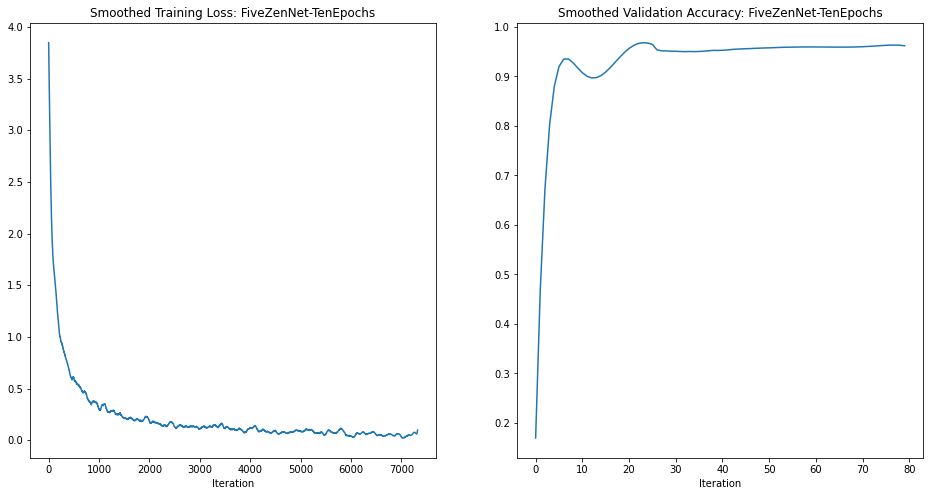

In [11]:
# Plot Loss and Accuracy:

name = "FiveZenNet-TenEpochs"

training_smooth = savgol_filter(training_accuracy, 301 , 7)
validation_smooth = savgol_filter(validation_accuracy, 51, 7)

f = plt.figure(figsize=(16,8))
ax = f.add_subplot(1,2,1)
ax.plot(training_smooth)
# ax.set_yscale('log')
ax.set_title('Smoothed Training Loss: ' + name)
ax.set_xlabel('Iteration')

ax = f.add_subplot(1,2,2)
ax.plot(validation_smooth)
ax.set_title('Smoothed Validation Accuracy: ' + name)
ax.set_xlabel('Iteration')

print('Final Test Accuracy: %.1f' % (test_accuracy * 100))
print()



In [0]:
# Save Model and Data

day =  date.today().strftime("%b-%d-%Y")

name = "FiveZenNet-TenEpochs"

filename = PATH+"models/" + name + "_" + day + ".pth"
torch.save(model.state_dict(),filename)

data_fn = PATH+"data/" + name + "_" + day + "_"
train_fn = data_fn + "training.csv"
validate_fn = data_fn + "validation.csv"


np.savetxt(train_fn, training_accuracy, delimiter=',')
np.savetxt(validate_fn, validation_accuracy, delimiter=',')

/content/gdrive/My Drive/CS/CMSC-254/ASL-Handshape-Dataset/data/FiveZenNet-TenEpochs-Gaussian_Mar-24-2020_training.csv


In [0]:
# BLURRING AUGMENTATION

# Additional Filters:

# Gaussian filter
''' Credit to https://discuss.pytorch.org/t/is-there-anyway-to-do-gaussian-filtering-for-an-image-2d-3d-in-pytorch/12351/3
for the code for this filter. 
'''

def gaussian(kernel_size=3, sigma=1, channels=3):
  # Create a x, y coordinate grid of shape (kernel_size, kernel_size, 2)
  x_coord = torch.arange(kernel_size)
  x_grid = x_coord.repeat(kernel_size).view(kernel_size, kernel_size)
  y_grid = x_grid.t()
  xy_grid = torch.stack([x_grid, y_grid], dim=-1).float()

  mean = (kernel_size - 1)/2.
  variance = sigma**2.

  # Calculate the 2-dimensional gaussian kernel which is
  # the product of two gaussian distributions for two different
  # variables (in this case called x and y)
  gaussian_kernel = (1./(2.*math.pi*variance)) *\
                    torch.exp(
                        -torch.sum((xy_grid - mean)**2., dim=-1) /\
                        (2*variance)
                    )

  # Make sure sum of values in gaussian kernel equals 1.
  gaussian_kernel = gaussian_kernel / torch.sum(gaussian_kernel)

  # Reshape to 2d depthwise convolutional weight
  gaussian_kernel = gaussian_kernel.view(1, 1, kernel_size, kernel_size)
  gaussian_kernel = gaussian_kernel.repeat(channels, 1, 1, 1)

  gaussian_filter = nn.Conv2d(in_channels=channels, out_channels=channels,
                              kernel_size=kernel_size, groups=channels, bias=False,padding=kernel_size,padding_mode='reflection')

  gaussian_filter.weight.data = gaussian_kernel
  gaussian_filter.weight.requires_grad = False

  return gaussian_filter

# Motion blur filter
# Only in diagonal and cardinal directions
# Borrowing code from the above sections, but most is my own

def motion(k, direction, channels=3):
  # Create a x, y coordinate grid of shape (kernel_size, kernel_size, 2)
  x_coord = torch.zeros(k)
  xy_grid = x_coord.repeat(k).view(k, k).float()

  if direction == 0: # horizontal blur
    xy_grid[k//2,:] = 1
  elif direction == 1: #vertical direction
    xy_grid[:,k//2] = 1
  elif direction == 2: #diagonal 
    for i in range(0,k):
      xy_grid[i,k-i-1] = 1
  elif direction == 3: 
    for i in range(0,k):
      xy_grid[i,i] = 1

  motion_kernel = xy_grid

  # Reshape to 2d depthwise convolutional weight
  motion_kernel = motion_kernel.view(1, 1, k, k)
  motion_kernel = motion_kernel.repeat(channels, 1, 1, 1)

  motion_filter = nn.Conv2d(in_channels=channels, out_channels=channels,
                              kernel_size=k, groups=channels, bias=False,padding=k,padding_mode='reflection')

  motion_filter.weight.data = motion_kernel
  motion_filter.weight.requires_grad = False

  return motion_filter

class Augmentation(nn.Module):
    def __init__(self,augment_filter):
        super(Augmentation, self).__init__()
        self.augment = augment_filter

    def forward(self, x):
        x = self.augment(x)
        c,d,w,h = x.size()
        tw = 90
        th = 150
        x1 = int(round((w - tw) / 2.))
        y1 = int(round((h - th) / 2.))
        return x[:,:,x1:x1+tw,y1:y1+th]

def augment(aug,x,device):
  x = x.to(device=device)

  if aug == "Gaussian":
    sigma = random.randint(1,4) # sigmas 1-3
    k = 3*sigma + 1 - (3*sigma%2)
    gaussian_blur = gaussian(k,sigma)
    filt = Augmentation(gaussian_blur)
    filt = filt.to(device=device)
    filt.eval()
    x = filt(x)

  if aug == "Motion":
    k = random.randint(3,15) # random size 3-15
    k = k + 1 - k%2
    direction = random.randint(0,3)
    motion_blur = motion(k,direction)
    filt = Augmentation(motion_blur)
    filt = filt.to(device=device)
    filt.eval()
    x = filt(x)

  return x



In [0]:
# Testing Existing Models on Augmented Data

SD_path = PATH + "models/"+ "FiveZenNet-HundredEpochs_Mar-23-2020" + ".pth"
model = FiveZenNet()
model.load_state_dict(torch.load(SD_path))
model = model.to(device=device)

normal_test_accuracy = test(loader_test,model,False)
print("Test Acccuracy on non-augmented data: {}".format(normal_test_accuracy * 100))

gaussian_test_accuracy = test(loader_test,model,False,aug="Gaussian")
print("Test Acccuracy on data augmented with Gaussian blur: {}".format(gaussian_test_accuracy * 100))

motion_test_accuracy = test(loader_test,model,False,aug="Motion")
print("Test Acccuracy on data augmented with Motion blur: {}".format(motion_test_accuracy * 100))



Checking accuracy on test set
Got 5877 / 6025 correct (97.54)
Test Acccuracy on non-augmented data: 97.54356846473028
Checking accuracy on test set
Got 5682 / 6025 correct (94.31)
Test Acccuracy on data augmented with Gaussian blur: 94.30705394190872
Checking accuracy on test set
Got 1954 / 6025 correct (32.43)
Test Acccuracy on data augmented with Motion blur: 32.43153526970954


Learning Rate between Different Models


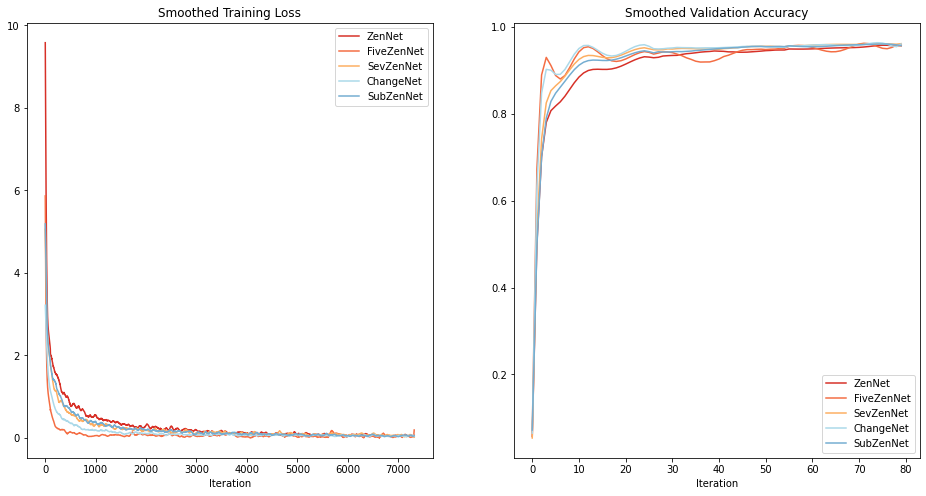

In [0]:
# Comparing learning
PATH = '/content/gdrive/My Drive/CS/CMSC-254/ASL-Handshape-Dataset/'
base = PATH + "data/"

#files = ["FiveZenNet-TenEpochs_Mar-24-2020","FiveZenNet-TenEpochs-Gaussian_Mar-24-2020","FiveZenNet-TenEpochs_Motion_Mar-24-2020"]
files = ["VanillaZenNet-TenEpochs_Mar-21-2020","SubZenNet-TenEpochs_Mar-23-2020","FiveZenNet-TenEpochs_Mar-24-2020","SevZenNet-TenEpochs_Mar-23-2020","ChangeZenNet-TenEpochs_Mar-23-2020"]

#names = ["No Blur","Gaussian","Motion"]
names = ["ZenNet","FiveZenNet","SevZenNet","ChangeNet","SubZenNet"]

colors = ["#d73027","#f46d43","#fdae61","#abd9e9","#74add1","#4575b4"]

#print("Learning Rate between No Blur, Gaussian Blur, and Motion Blur")
print("Learning Rate between Different Models")


f = plt.figure(figsize=(16,8))
ax = f.add_subplot(1,2,1)
# ax.set_yscale('log')
for i in range(len(files)):
  fp = base + files[i] + '_training.csv'
  data = np.loadtxt(fp,delimiter=',')
  smooth = savgol_filter(data,201,7)
  name = names[i]
  ax.plot(smooth,color=colors[i],label=name)
ax.set_title('Smoothed Training Loss')
ax.set_xlabel('Iteration')
ax.legend()

ax = f.add_subplot(1,2,2)
for i in range(len(files)):
  fp = base + files[i] + '_validation.csv'
  data = np.loadtxt(fp,delimiter=',')
  smooth = savgol_filter(data,51,11)
  name = names[i]
  ax.plot(smooth,color=colors[i],label=name)
ax.set_title('Smoothed Validation Accuracy')
ax.set_xlabel('Iteration')
ax.legend()

